# Data Preprocessing

### Importing data

In [64]:
import pandas as pd

# Load the datasets
df= pd.read_csv('Dataset/Tasla_Stock_Updated_V2.csv')

# Check the first few rows to confirm successful import
print("Dataset Head:")
print(df.head())

print("Dataset Shape:")
print(df.shape[0])

Dataset Head:
   Unnamed: 0        Date       Open       High        Low      Close  \
0           0  2015-01-02  14.858000  14.883333  14.217333  14.620667   
1           1  2015-01-05  14.303333  14.433333  13.810667  14.006000   
2           2  2015-01-06  14.004000  14.280000  13.614000  14.085333   
3           3  2015-01-07  14.223333  14.318667  13.985333  14.063333   
4           4  2015-01-08  14.187333  14.253333  14.000667  14.041333   

     Volume  
0  71466000  
1  80527500  
2  93928500  
3  44526000  
4  51637500  
Dataset Shape:
2274


### Checking null values

In [65]:
missing_values = df.isnull().sum()
print(f"\nMissing Values count: {missing_values}")

total_missing_values = missing_values.sum()
print(f"\nTotal Missing Values: {total_missing_values}")


Missing Values count: Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

Total Missing Values: 0


### Converting date to datetime format and selecting as index

In [66]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

print("\nDataset after setting Date as index:")
print(df.head()) 


Dataset after setting Date as index:
            Unnamed: 0       Open       High        Low      Close    Volume
Date                                                                        
2015-01-02           0  14.858000  14.883333  14.217333  14.620667  71466000
2015-01-05           1  14.303333  14.433333  13.810667  14.006000  80527500
2015-01-06           2  14.004000  14.280000  13.614000  14.085333  93928500
2015-01-07           3  14.223333  14.318667  13.985333  14.063333  44526000
2015-01-08           4  14.187333  14.253333  14.000667  14.041333  51637500


### Splitting dataset into train and test set

In [67]:
split_date = '2021-01-01'

df_train_raw = df[df.index < split_date].copy()
df_test_raw = df[df.index >= split_date].copy()

### Generalized function for feature engineering

In [ ]:
def create_features(df):
    df['Monthly_Return'] = df['Close'].pct_change() * 100 #wrong
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['Volatility_5'] = df['Close'].rolling(window=5).std()
    df['Volatility_10'] = df['Close'].rolling(window=10).std()
    df['Volatility_20'] = df['Close'].rolling(window=20).std()
    
    #target
    df['Target'] = df['Close'].shift(-1)
    
    df.dropna(inplace=True) 
    return df

### Creating features for train and test set

In [69]:
df_train = create_features(df_train_raw)
df_test = create_features(df_test_raw)

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Train head:\n", df_train.head())
print("Test head:\n", df_test.head())

Train shape: (1491, 14)
Test shape: (743, 14)
Train head:
             Unnamed: 0       Open       High        Low      Close    Volume  \
Date                                                                           
2015-01-30          19  13.597333  13.831333  13.533333  13.573333  45105000   
2015-02-02          20  13.598000  14.130000  13.553333  14.062667  62238000   
2015-02-03          21  14.214667  14.691333  14.084667  14.557333  72393000   
2015-02-04          22  14.552667  14.765333  14.453333  14.570000  49581000   
2015-02-05          23  14.658667  15.032000  14.642667  14.732667  52843500   

            Monthly_Return        MA5       MA10       MA20  Volatility_5  \
Date                                                                        
2015-01-30       -0.779733  13.609333  13.367867  13.550367      0.192533   
2015-02-02        3.605114  13.667867  13.487000  13.522467      0.278766   
2015-02-03        3.517584  13.832933  13.663200  13.550033      0.49031

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_features_minmax(df_train, df_test, feature_cols):
    """
    Applies MinMax scaling to the given feature columns.
    Scaler is fit on train data only to prevent data leakage.

    Parameters:
        df_train (pd.DataFrame): Training dataset
        df_test (pd.DataFrame): Testing dataset
        feature_cols (list): List of column names to scale

    Returns:
        df_train_scaled (pd.DataFrame): Scaled training dataset
        df_test_scaled (pd.DataFrame): Scaled testing dataset
        scaler (MinMaxScaler): The fitted scaler object
    """
    scaler = MinMaxScaler()
    
    # Copy to preserve original data
    df_train_scaled = df_train.copy()
    df_test_scaled = df_test.copy()

    # Fit scaler on training data, transform both
    df_train_scaled[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    df_test_scaled[feature_cols] = scaler.transform(df_test[feature_cols]) #only transoform to avoid data leakage

    return df_train_scaled, df_test_scaled, scaler


# Define the feature columns to scale
features_to_scale = ['Close', 'Monthly_Return', 'MA5', 'MA10', 'MA20',
                     'Volatility_5', 'Volatility_10', 'Volatility_20']

# Call the function
df_train_scaled, df_test_scaled, fitted_scaler = scale_features_minmax(df_train, df_test, features_to_scale)
print("Scaled Train shape:", df_train_scaled.shape)
print("Scaled Test shape:", df_test_scaled.shape)

Scaled Train shape: (1491, 14)
Scaled Test shape: (743, 14)


# Exploratory Data Analysis (EDA)

In [89]:
df_full=create_features(df)

### Trends


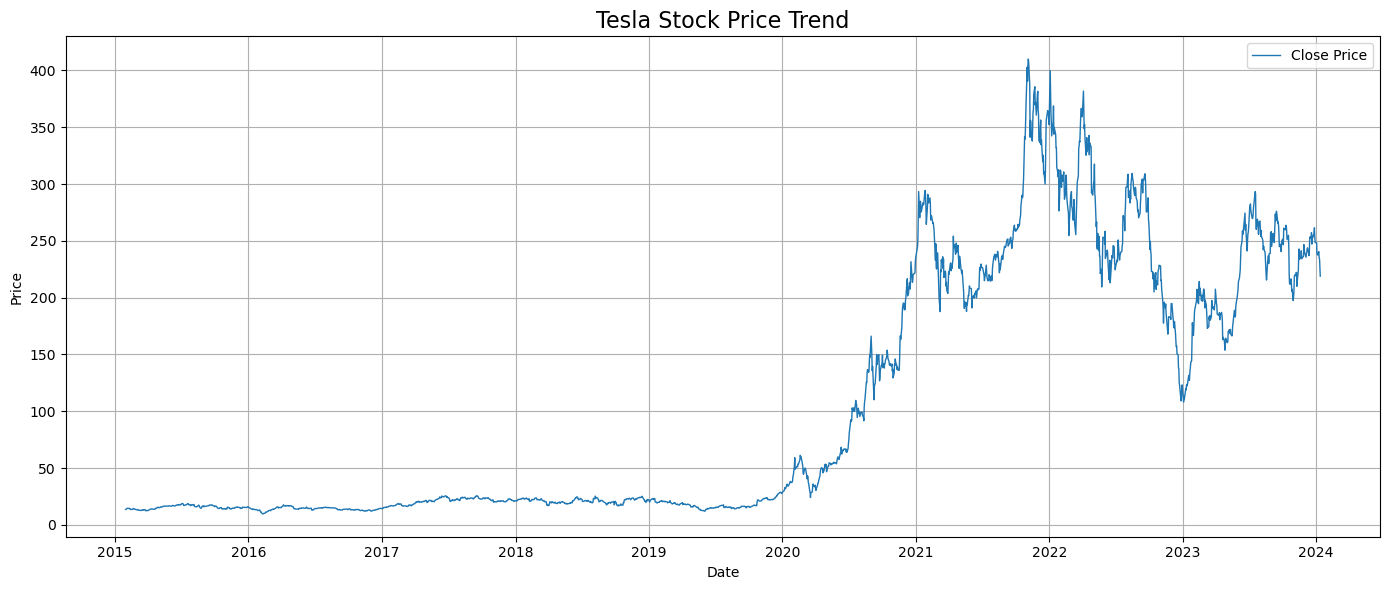

In [95]:
import matplotlib.pyplot as plt

# Plot close price
plt.figure(figsize=(14, 6))
plt.plot(df_full.index, df_full['Close'], label='Close Price', linewidth=1)


plt.title('Tesla Stock Price Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


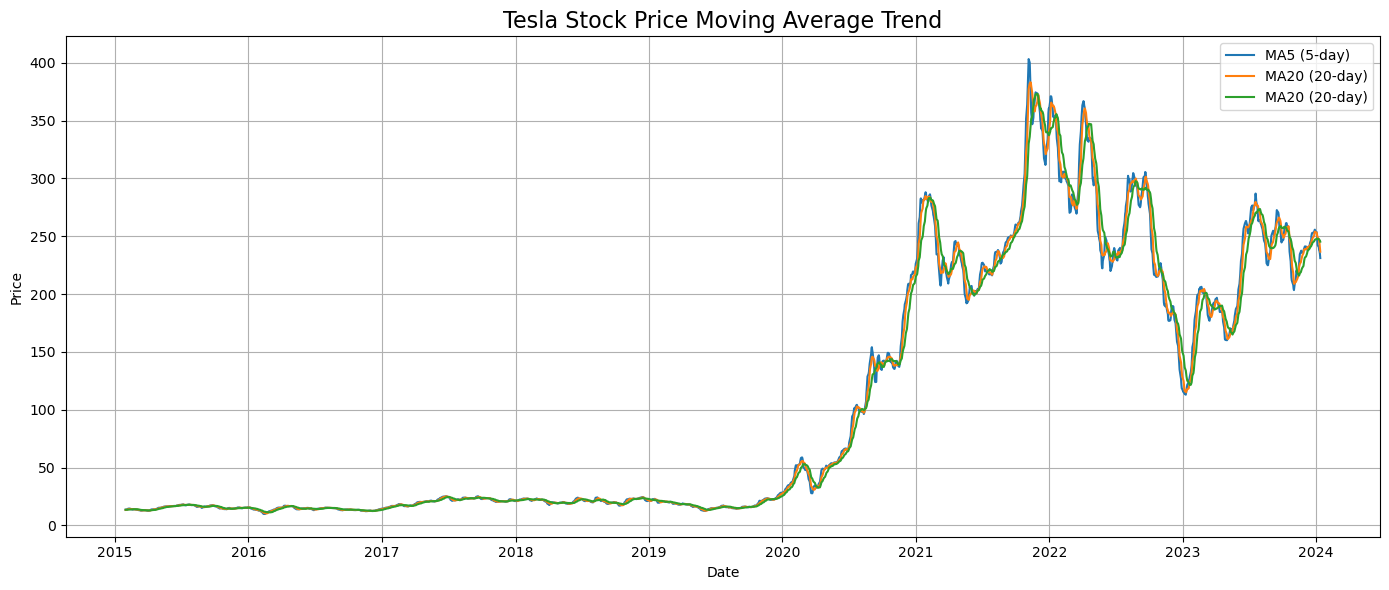

In [96]:
plt.figure(figsize=(14, 6))

plt.plot(df_full.index, df_full['MA5'], label='MA5 (5-day)', linewidth=1.5)
plt.plot(df_full.index, df_full['MA10'], label='MA20 (20-day)', linewidth=1.5)
plt.plot(df_full.index, df_full['MA20'], label='MA20 (20-day)', linewidth=1.5)

plt.title('Tesla Stock Price Moving Average Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Seasonality


#### Average Weekly Return

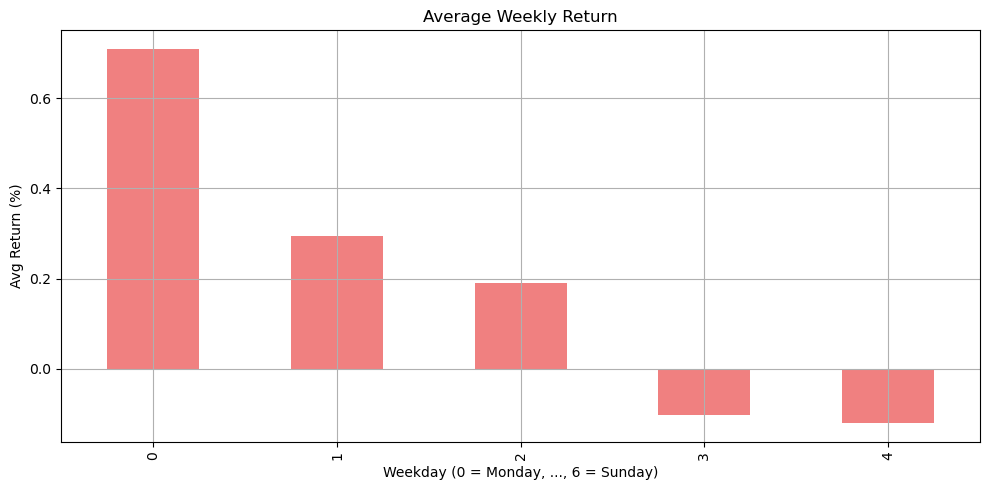

In [98]:
# Extract weekday from the Date column (0 = Monday, 6 = Sunday)
df_full['Weekday'] = df_full.index.weekday

# Calculate average return by weekday
weekly_avg_return = df_full.groupby('Weekday')['Monthly_Return'].mean()

# Plot the average return for each weekday
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
weekly_avg_return.plot(kind='bar', color='lightcoral')
plt.title('Average Weekly Return')
plt.xlabel('Weekday (0 = Monday, ..., 6 = Sunday)')
plt.ylabel('Avg Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Quaterly Seasonality

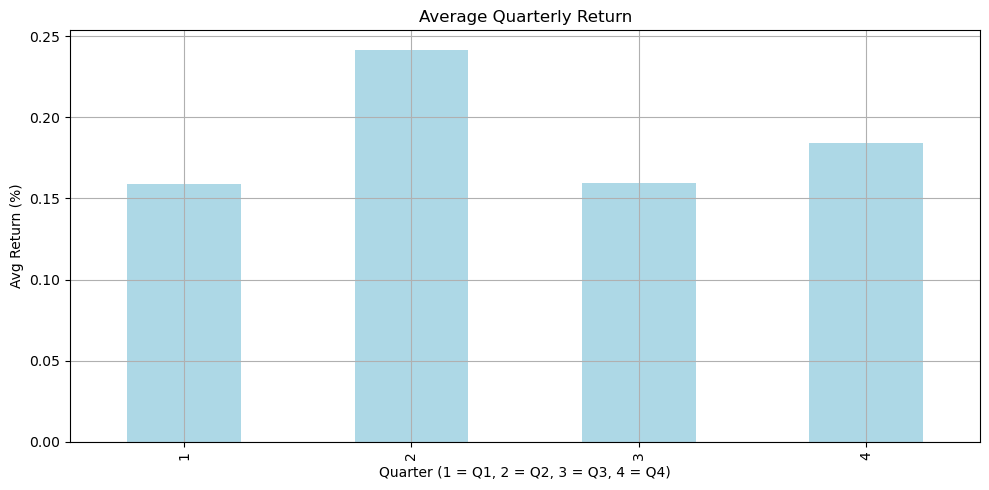

In [101]:
# Extract quarter from Date (1 = Q1, 2 = Q2, 3 = Q3, 4 = Q4)
df_full['Quarter'] = df_full.index.quarter

# Calculate average return by quarter
quarterly_avg_return = df_full.groupby('Quarter')['Monthly_Return'].mean()

# Plot the average return per quarter
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
quarterly_avg_return.plot(kind='bar', color='lightblue')
plt.title('Average Quarterly Return')
plt.xlabel('Quarter (1 = Q1, 2 = Q2, 3 = Q3, 4 = Q4)')
plt.ylabel('Avg Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Volatiliy

In [105]:
# Calculate rolling volatility for 5, 10, 20, 50 days
df_full['Volatility_5'] = df_full['Close'].rolling(window=5).std()
df_full['Volatility_10'] = df_full['Close'].rolling(window=10).std()
df_full['Volatility_20'] = df_full['Close'].rolling(window=20).std()
df_full['Volatility_50'] = df_full['Close'].rolling(window=50).std()


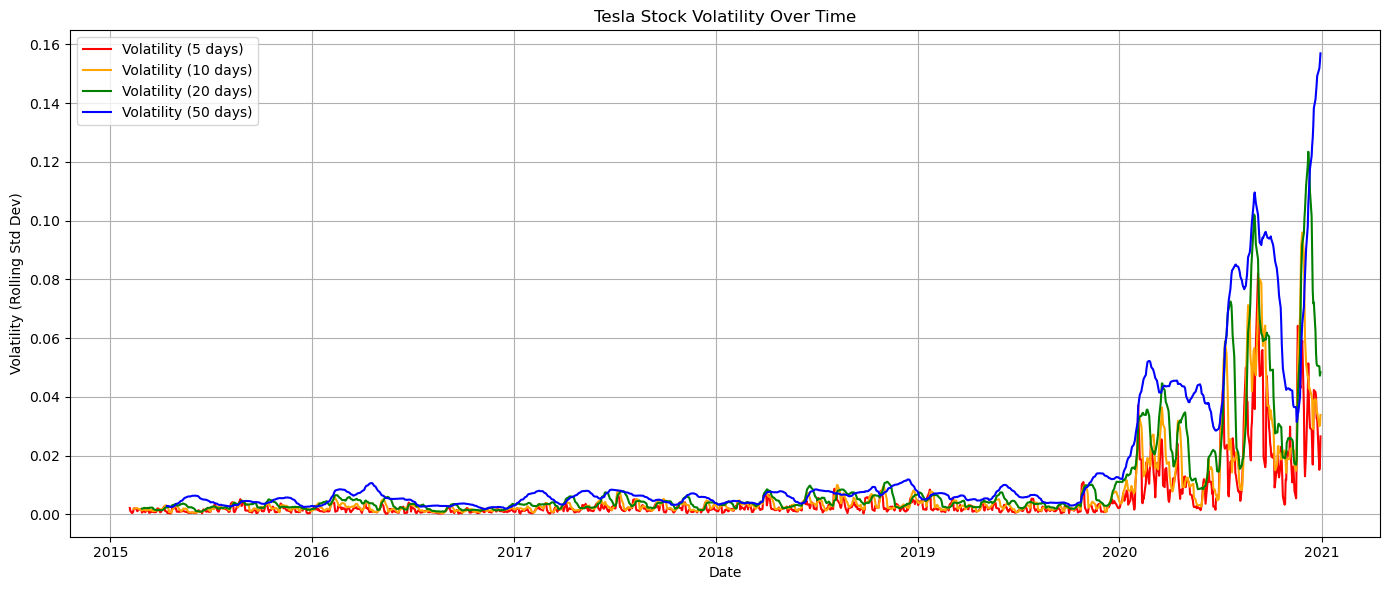

In [104]:
import matplotlib.pyplot as plt

# Plot rolling volatility for different windows
plt.figure(figsize=(14, 6))
plt.plot(df_train_scaled.index, df_train_scaled['Volatility_5'], label='Volatility (5 days)', color='red')
plt.plot(df_train_scaled.index, df_train_scaled['Volatility_10'], label='Volatility (10 days)', color='orange')
plt.plot(df_train_scaled.index, df_train_scaled['Volatility_20'], label='Volatility (20 days)', color='green')
plt.plot(df_train_scaled.index, df_train_scaled['Volatility_50'], label='Volatility (50 days)', color='blue')

# Adding labels and title
plt.title('Tesla Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (Rolling Std Dev)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


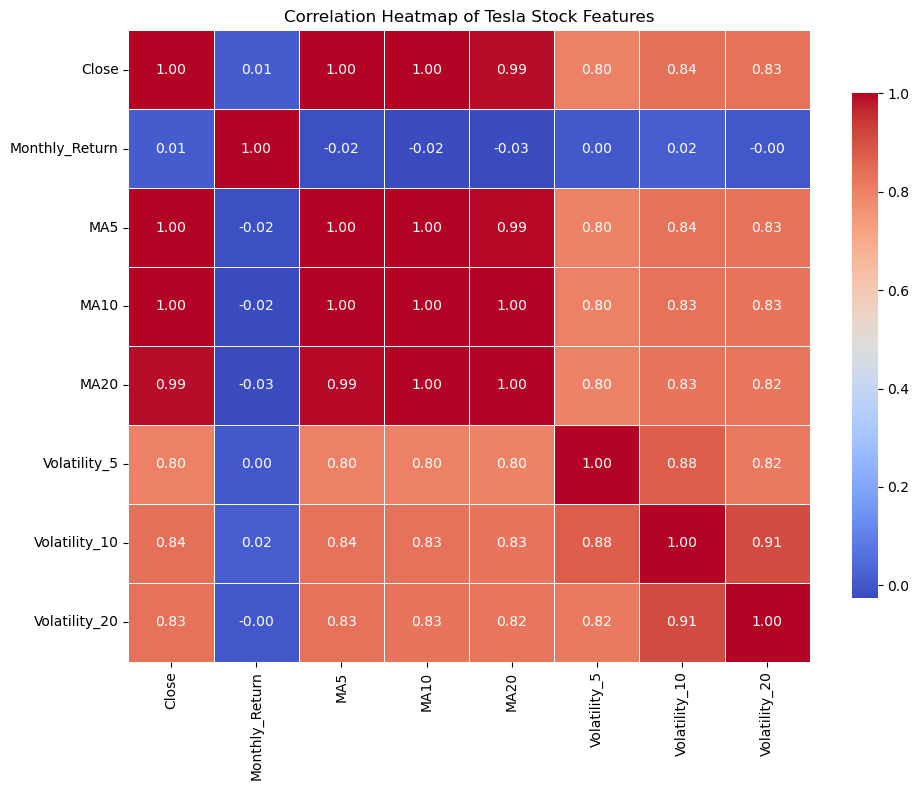

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df_full[['Close', 'Monthly_Return', 'MA5', 'MA10', 'MA20',
                                'Volatility_5', 'Volatility_10', 'Volatility_20']].corr()

# Set up the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})

# Add title and labels
plt.title('Correlation Heatmap of Tesla Stock Features')
plt.tight_layout()

# Show the plot
plt.show()


### Volume vs Price movement

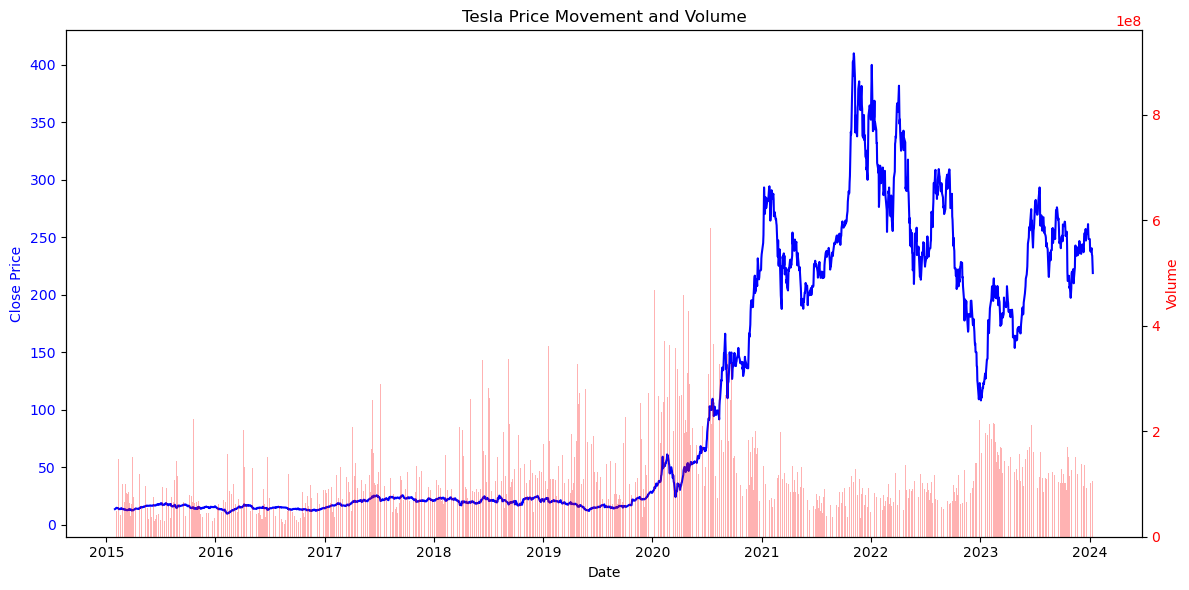

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Close Price and Volume
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Closing Price (on the first y-axis)
ax1.plot(df_full.index, df_full['Close'], label='Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the Volume
ax2 = ax1.twinx()
ax2.bar(df_full.index, df_full['Volume'], label='Volume', color='red', alpha=0.3)
ax2.set_ylabel('Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title('Tesla Price Movement and Volume')
plt.tight_layout()

# Show the plot
plt.show()  


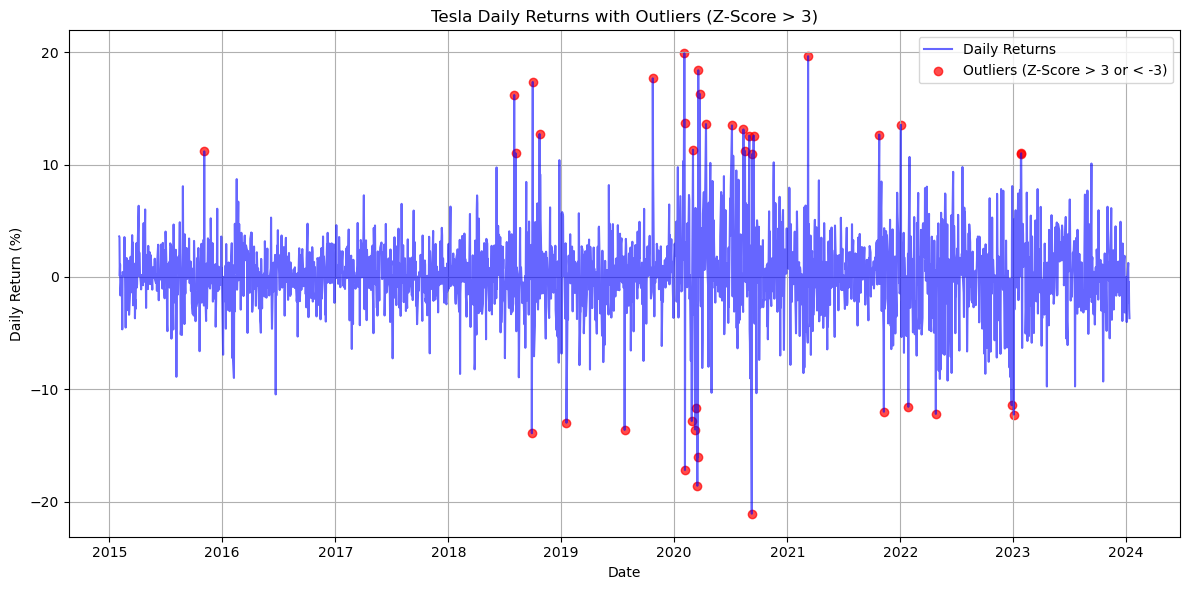

38

In [131]:
from scipy.stats import zscore

# Calculate Daily Returns
#df_full['Daily_Return'] = df_full['Close'].pct_change() * 100

# Calculate Z-scores for 'Daily_Return'
df_full['Z-Score_Return'] = zscore(df_full['Monthly_Return'].dropna())

# Mark outliers where Z-Score is > 3 or < -3 for daily returns
outliers_zscore_return = df_full[abs(df_full['Z-Score_Return']) > 3]

# Plot the daily returns and highlight outliers
plt.figure(figsize=(12, 6))
plt.plot(df_full.index, df_full['Daily_Return'], label='Daily Returns', color='blue', alpha=0.6)
plt.scatter(outliers_zscore_return.index, outliers_zscore_return['Daily_Return'], color='red', label='Outliers (Z-Score > 3 or < -3)', alpha=0.7)
plt.title('Tesla Daily Returns with Outliers (Z-Score > 3)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

len(outliers_zscore_return)

In [138]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for Monthly Returns
skewness = skew(df_full['Monthly_Return'].dropna())
kurt = kurtosis(df_full['Monthly_Return'].dropna())

print(f"Skewness of Monthly Returns: {skewness}")
print(f"Kurtosis of Monthly Returns: {kurt}")


Skewness of Monthly Returns: 0.17845241150064578
Kurtosis of Monthly Returns: 4.310336290643985


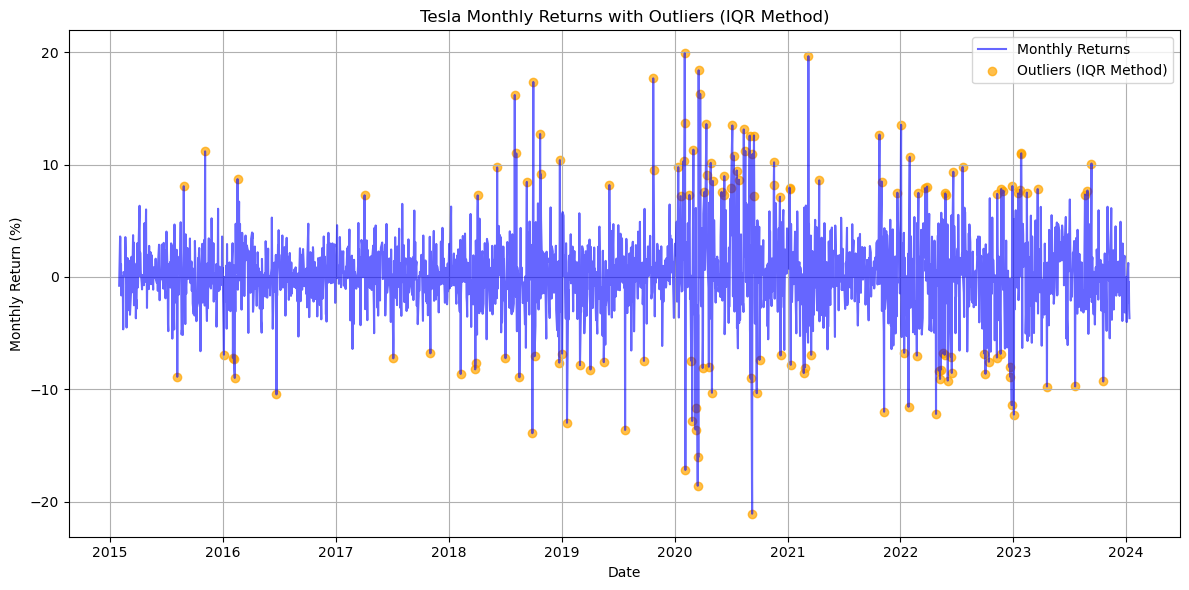

Number of outliers based on IQR Method: 143


In [136]:
import matplotlib.pyplot as plt

# Calculate Q1, Q3 and IQR for detecting outliers in Monthly Return
Q1 = df_full['Monthly_Return'].quantile(0.25)
Q3 = df_full['Monthly_Return'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers using the IQR method
outliers_iqr_return = df_full[(df_full['Monthly_Return'] < lower_bound) | (df_full['Monthly_Return'] > upper_bound)]

# Plot the Monthly Returns and highlight the outliers
plt.figure(figsize=(12, 6))
plt.plot(df_full.index, df_full['Monthly_Return'], label='Monthly Returns', color='blue', alpha=0.6)
plt.scatter(outliers_iqr_return.index, outliers_iqr_return['Monthly_Return'], color='orange', label='Outliers (IQR Method)', alpha=0.7)
plt.title('Tesla Monthly Returns with Outliers (IQR Method)')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Count the number of outliers
num_outliers_iqr = len(outliers_iqr_return)
print(f"Number of outliers based on IQR Method: {num_outliers_iqr}")
